In [12]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
from patsy import dmatrices
import scipy as sp
import statsmodels.api as sm
%matplotlib inline

In [13]:
movie_csv = pd.read_csv('../../../challenges_data/2013_movies.csv')
movie_csv.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

# Challenge #1

In [15]:
movie_csv['const'] = 1
m, n = dmatrices('DomesticTotalGross ~ const ', data = movie_csv, return_type = 'dataframe')
model = sm.OLS(m,n).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sun, 24 Jul 2016   Prob (F-statistic):                nan
Time:                        16:01:23   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.000      4.16e+07   5.9e+07
const        5.03e+07   4.37e+06     11.510      0.000      4.16e+07   5.9e+07
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

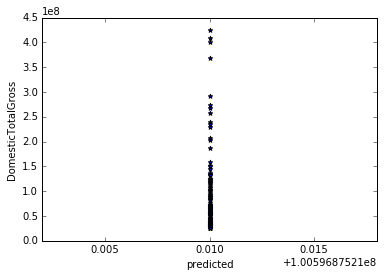

In [16]:
results = model.predict()
movie_csv['predicted'] = results
plot_1 = movie_csv.plot(kind = 'scatter', marker = '*', x = 'predicted', y = 'DomesticTotalGross')

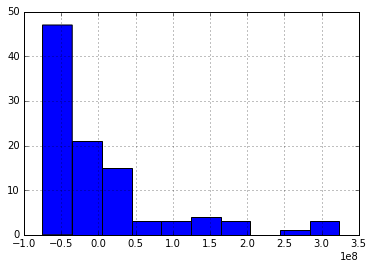

In [7]:
movie_csv['residuals'] = model.resid
plot_2 = movie_csv['residuals'].hist()

In [ ]:
'''The x-axis is the mean for all of the movies' domestic total gross
It predicts the domestic total gross
The residuals are right skewed'''

# Challenge 2

In [8]:
movie_csv.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,const,predicted,residuals
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,1.005969e+08,3.240712e+08
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,1.005969e+08,3.084171e+08
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,1.005969e+08,3.001411e+08
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,1.005969e+08,2.674644e+08
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,1.005969e+08,1.904486e+08


                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sat, 23 Jul 2016   Prob (F-statistic):           6.80e-08
Time:                        10:03:11   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.387e-09   1.25e-09      3.504      0.0

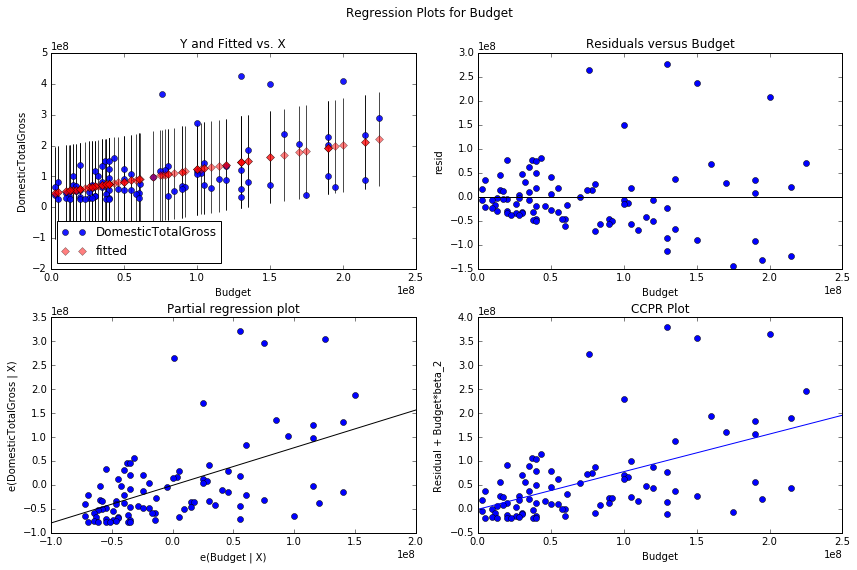

In [9]:
x, y = dmatrices('DomesticTotalGross ~ predicted + Budget ', data = movie_csv, return_type = 'dataframe')
model2 = sm.OLS(x, y).fit()
prediction = model2.predict()
results = model2.summary()
print(results)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2,'Budget', fig=fig)

It looks like there is heteroskedasticity in the scatter plot and the data is highly skewed.
Statsmodels is also saying that there are strong multicollinearity problems so the parameters should not be used with each other.
There is not much correlation between the parameters and the predicted value.  More parameters need to be added in order to improve the predictive power of this model.

# Challenge 3

In [21]:
# a, b = dmatrices('DomesticTotalGross ~ predicted + Budget + Rating', data = movie_csv, return_type = 'dataframe')
# model3 = sm.OLS(a, b).fit()
# prediction = model3.predict()
# results = model3.summary()
# print(results)

In [9]:
movie_csv_dummies = pd.get_dummies(movie_csv, columns = ['Rating'])
movie_csv_dummies.head(2)
#final_df = pd.get_dummies(merged_dff, columns = ['genre'])

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate,const,predicted,residuals,Rating_G,Rating_PG,Rating_PG-13,Rating_R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,146,2013-11-22 00:00:00,1,1.005969e+08,3.240712e+08,0.0,0.0,1.0,0.0
1,Iron Man 3,200000000.0,409013994,Shane Black,129,2013-05-03 00:00:00,1,1.005969e+08,3.084171e+08,0.0,0.0,1.0,0.0


In [26]:
q, w = dmatrices('DomesticTotalGross ~ predicted + Budget + Rating_PG', data = movie_csv_dummies, return_type = 'dataframe')
model4 = sm.OLS(q, w).fit()
prediction = model4.predict()
results = model4.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     17.61
Date:                Wed, 20 Jul 2016   Prob (F-statistic):           3.90e-07
Time:                        16:35:12   Log-Likelihood:                -1737.8
No. Observations:                  89   AIC:                             3482.
Df Residuals:                      86   BIC:                             3489.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.205e-09   1.28e-09      3.290      0.0

I filtered on rating so given the rating that I chose, it is running the least squares on the films that fall into that category.

# Challenge 4

In [10]:
movie_csv_dummies['log_dtg'] = movie_csv_dummies['DomesticTotalGross'].apply(lambda x: np.log(x))


In [11]:
i, j = dmatrices('log_dtg ~ predicted + Budget + Runtime', data = movie_csv_dummies, return_type = 'dataframe')
model4 = sm.OLS(i, j).fit()
prediction = model4.predict()
results = model4.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                log_dtg   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     19.16
Date:                Thu, 21 Jul 2016   Prob (F-statistic):           1.31e-07
Time:                        15:24:36   Log-Likelihood:                -79.076
No. Observations:                  89   AIC:                             164.2
Df Residuals:                      86   BIC:                             171.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.706e-15   4.08e-17     41.791      0.0

# Challenge 5

In [36]:
from sklearn import cross_validation as cv
from sklearn import metrics
from sklearn.linear_model import LinearRegression

i, j = dmatrices('log_dtg ~ predicted + Budget + Runtime', data = movie_csv_dummies, return_type = 'dataframe')
j.head()
model = LinearRegression()
model.fit(i, j)

model.score(i,j)

0.29905537274212673

In [37]:
x_train, x_test, y_train, y_test = cv.train_test_split(i,j,test_size=0.25, random_state=1234)

model = LinearRegression().fit(x_train, y_train)

In [42]:
#sum_squares_regr= np.sum((model.predict(x_train) - np.mean(y_train))**2)
#model.predict(x_train)
print(len(x_train))
print(np.mean(y_train))

66
Intercept    1.000000e+00
predicted    1.005969e+08
Budget       7.964394e+07
Runtime      1.128333e+02
dtype: float64


In [31]:
#x_train.log_dtg
y_train.head()

,Intercept,predicted,Budget,Runtime
37,1.0,1.005969e+08,115000000.0,109.0
77,1.0,1.005969e+08,175000000.0,127.0
56,1.0,1.005969e+08,110000000.0,114.0
65,1.0,1.005969e+08,84000000.0,116.0
57,1.0,1.005969e+08,46000000.0,146.0


In [44]:
metrics.mean_squared_error(y_train, model.predict(x_train))

662222664815006.25

In [45]:
metrics.mean_squared_error(y_test, model.predict(x_test))

514375411901030.62